## AgeBinned Phase 4 (Modeling)

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 15](https://data-science.training/kapitel-15/)
* Datum: 23.03.2023

Version 2

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions_multiclass as sfm
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 2
version = 2
# Modelle
models = { 'knn': KNeighborsClassifier(), 'nb': GaussianNB(),
           'dt': DecisionTreeClassifier(random_state=0), 'mlp': MLPClassifier(random_state=0),
           'svm': SVC(random_state=0, probability=True), 'lr': LogisticRegression(random_state=0),
           'rf': RandomForestClassifier(random_state=0), 'gb': GradientBoostingClassifier(random_state=0) }

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/age/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Informationen zu den Spalten
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             941 non-null    int64  
 1   Parch             941 non-null    int64  
 2   Fare              941 non-null    float64
 3   TicketCount       941 non-null    int64  
 4   LogFare           941 non-null    float64
 5   FirstnameMeanAge  941 non-null    float64
 6   Pclass_2          941 non-null    int64  
 7   Pclass_3          941 non-null    int64  
 8   Sex_male          941 non-null    int64  
 9   Embarked_Q        941 non-null    int64  
 10  Embarked_S        941 non-null    int64  
 11  Title_Master      941 non-null    int64  
 12  Title_Miss        941 non-null    int64  
 13  Title_Mrs         941 non-null    int64  
 14  Title_Rare        941 non-null    int64  
 15  AgeBinned         941 non-null    object 
dtypes: float64(3), int64(12), object(1)
memory u

In [8]:
# Beschreibende Attribute extrahieren (ohne AgeBinned)
X = df_train.iloc[:,0:15].values
# Klassenattribut (AgeBinned) extrahieren
y = df_train.iloc[:,15].values

In [9]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [10]:
# Klassen (Reihenfolge beachten!)
#labels = df_train['AgeBinned'].unique()
labels = ['Child', 'Teenage', 'Young', 'Adult', 'Middle', 'Senior']

knn

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 47.3875 % |
| Makro-F-Maß  | (F-Score)     | 43.2611 % |
| AURC         | (AURC)        | 76.2085 % |
| LogLoss      | (LogLoss)     | 6.5979   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 76.2381 | 60.8929 | 67.1612 |
| Teenage | 51.5408 | 38.9744 | 43.3618 |
| Young | 56.4412 | 55.1613 | 55.3654 |
| Adult | 28.8473 | 37.7857 | 32.5245 |
| Middle | 49.6887 | 53.1287 | 50.9631 |
| Senior | 18.3333 | 7.5 | 10.1905 |
|--------|-----------|--------|-------|
| Makro  | 46.8482 | 42.2405 | 43.2611 |


Confusion Matrix



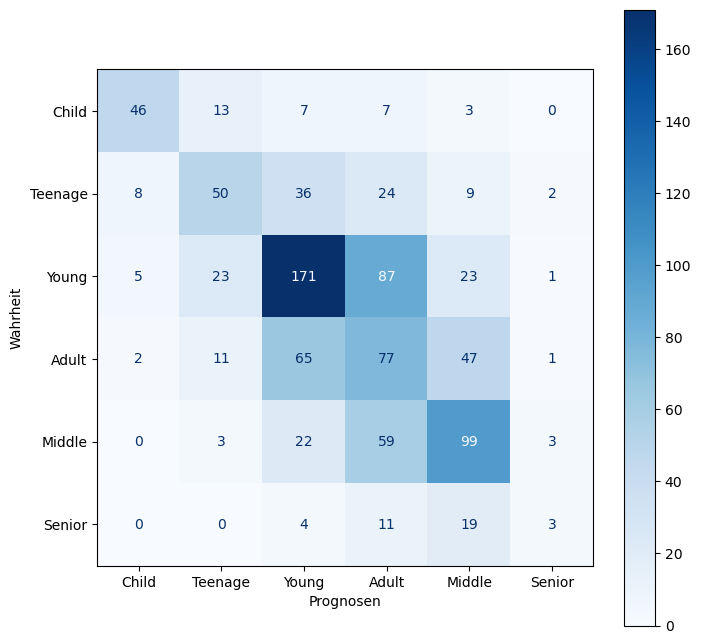


nb

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 48.3527 % |
| Makro-F-Maß  | (F-Score)     | 39.6627 % |
| AURC         | (AURC)        | 78.0214 % |
| LogLoss      | (LogLoss)     | 2.5619   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 59.0773 | 97.3214 | 73.0082 |
| Teenage | 28.3333 | 8.4615 | 12.7497 |
| Young | 50.5571 | 76.7742 | 60.7535 |
| Adult | 25.6993 | 9.8571 | 13.8981 |
| Middle | 53.7392 | 54.9708 | 52.5528 |
| Senior | 30.023 | 26.6667 | 25.0137 |
|--------|-----------|--------|-------|
| Makro  | 41.2382 | 45.6753 | 39.6627 |


Confusion Matrix



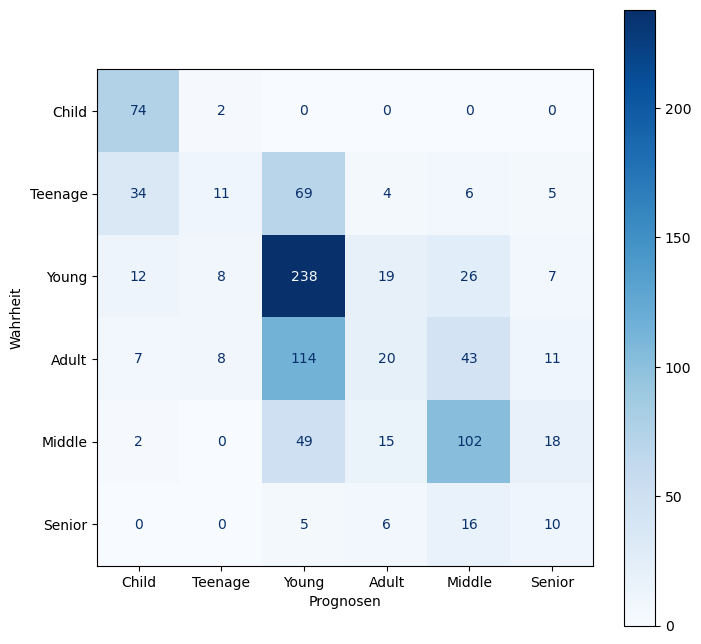


dt

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 49.4188 % |
| Makro-F-Maß  | (F-Score)     | 49.2428 % |
| AURC         | (AURC)        | 69.1549 % |
| LogLoss      | (LogLoss)     | 17.4961   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 84.5317 | 77.3214 | 80.249 |
| Teenage | 48.7234 | 46.6667 | 46.9734 |
| Young | 56.463 | 54.8387 | 54.967 |
| Adult | 32.9287 | 34.8571 | 33.2847 |
| Middle | 50.6194 | 50.8772 | 50.2279 |
| Senior | 38.4286 | 26.6667 | 29.7547 |
|--------|-----------|--------|-------|
| Makro  | 51.9491 | 48.538 | 49.2428 |


Confusion Matrix



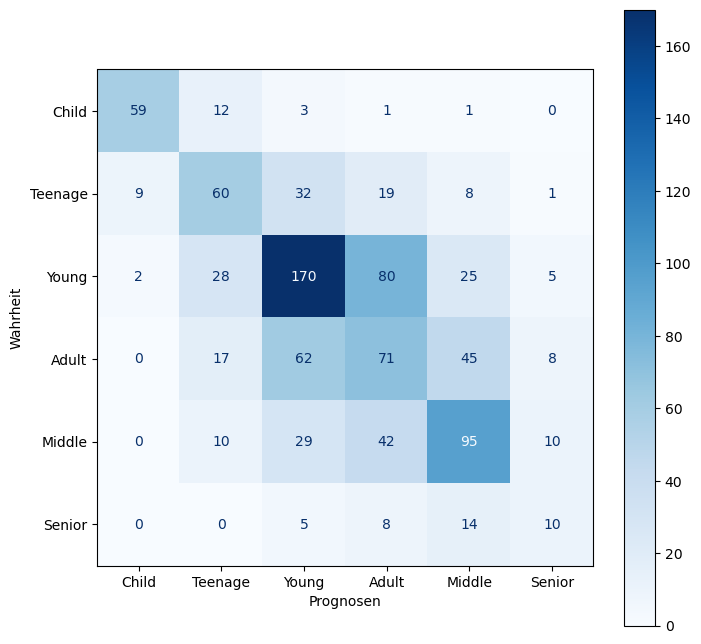


mlp

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 50.3673 % |
| Makro-F-Maß  | (F-Score)     | 43.8963 % |
| AURC         | (AURC)        | 82.9795 % |
| LogLoss      | (LogLoss)     | 1.1528   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 86.7421 | 85.7143 | 85.4463 |
| Teenage | 41.4722 | 23.2051 | 29.2835 |
| Young | 52.3067 | 68.3871 | 58.8676 |
| Adult | 32.6256 | 27.5238 | 27.4361 |
| Middle | 55.1856 | 58.655 | 55.4869 |
| Senior | 13.3333 | 5.0 | 6.8571 |
|--------|-----------|--------|-------|
| Makro  | 46.9443 | 44.7475 | 43.8963 |


Confusion Matrix



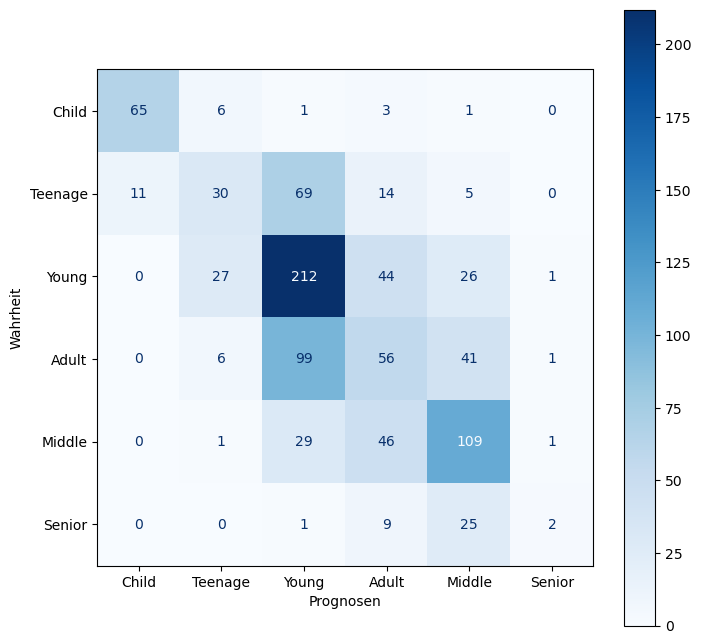


svm

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 48.14 % |
| Makro-F-Maß  | (F-Score)     | 34.3079 % |
| AURC         | (AURC)        | 81.025 % |
| LogLoss      | (LogLoss)     | 1.2314   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 86.2738 | 67.6786 | 74.5861 |
| Teenage | 0.0 | 0.0 | 0.0 |
| Young | 47.0509 | 83.871 | 60.1191 |
| Adult | 32.5696 | 11.3571 | 16.0619 |
| Middle | 48.9928 | 64.0643 | 55.0805 |
| Senior | 0.0 | 0.0 | 0.0 |
|--------|-----------|--------|-------|
| Makro  | 35.8145 | 37.8285 | 34.3079 |


Confusion Matrix



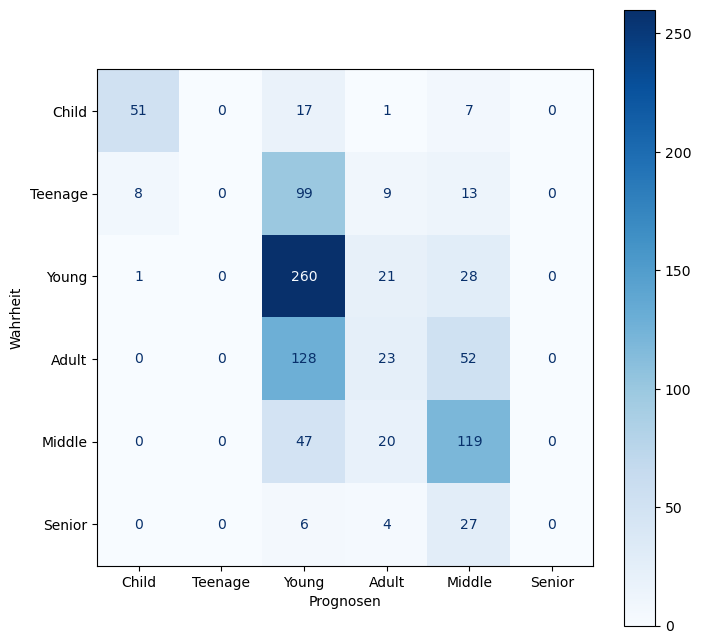


lr

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 48.1299 % |
| Makro-F-Maß  | (F-Score)     | 38.6305 % |
| AURC         | (AURC)        | 80.0283 % |
| LogLoss      | (LogLoss)     | 1.238   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 80.9206 | 74.1071 | 75.8304 |
| Teenage | 29.869 | 13.9103 | 18.6185 |
| Young | 48.6737 | 74.8387 | 58.765 |
| Adult | 32.5195 | 15.7619 | 20.5 |
| Middle | 49.1477 | 61.345 | 54.0691 |
| Senior | 10.0 | 2.5 | 4.0 |
|--------|-----------|--------|-------|
| Makro  | 41.8551 | 40.4105 | 38.6305 |


Confusion Matrix



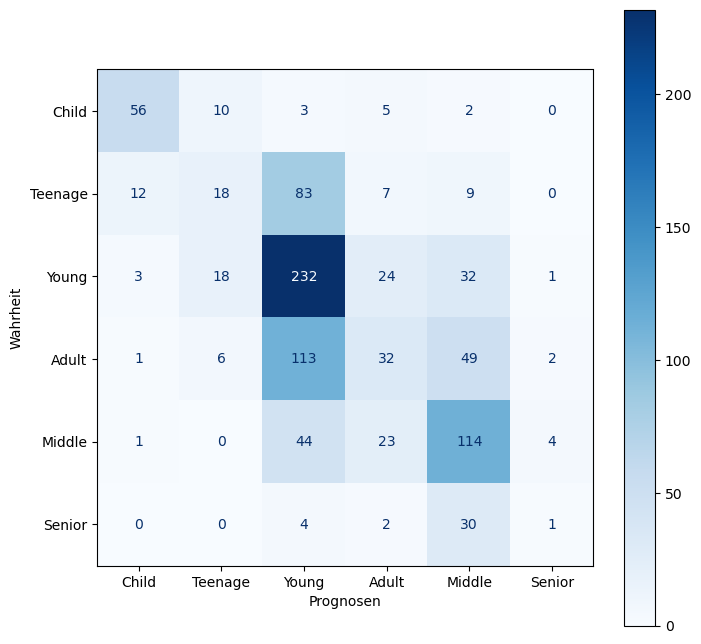


rf

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 51.2206 % |
| Makro-F-Maß  | (F-Score)     | 49.4304 % |
| AURC         | (AURC)        | 80.8092 % |
| LogLoss      | (LogLoss)     | 2.0887   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 87.377 | 93.5714 | 90.1013 |
| Teenage | 56.2565 | 41.9872 | 46.943 |
| Young | 53.8937 | 58.3871 | 55.7188 |
| Adult | 34.8329 | 31.881 | 32.3906 |
| Middle | 49.7617 | 56.9591 | 52.7618 |
| Senior | 31.6667 | 15.0 | 18.6667 |
|--------|-----------|--------|-------|
| Makro  | 52.2981 | 49.631 | 49.4304 |


Confusion Matrix



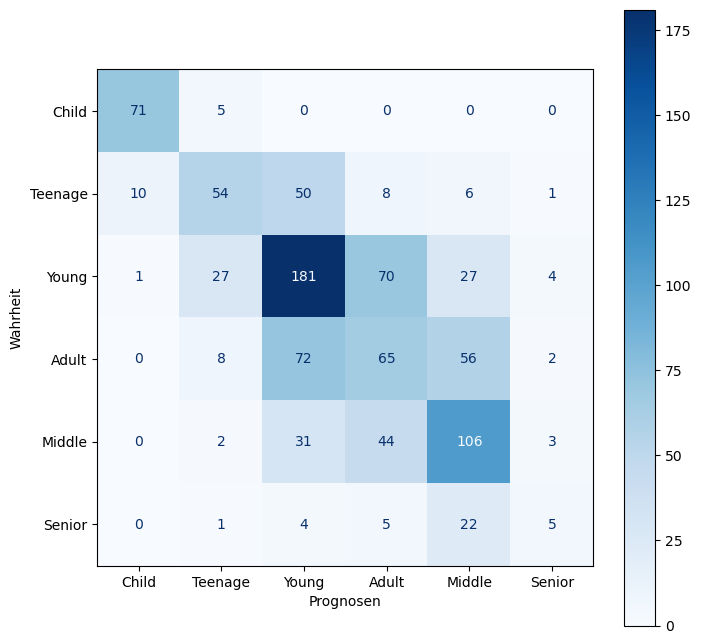


gb

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 58.8735 % |
| Makro-F-Maß  | (F-Score)     | 56.9139 % |
| AURC         | (AURC)        | 85.4428 % |
| LogLoss      | (LogLoss)     | 1.0935   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 88.9246 | 88.0357 | 88.2179 |
| Teenage | 58.5498 | 41.2821 | 47.1355 |
| Young | 60.2723 | 70.0 | 64.501 |
| Adult | 49.8801 | 45.3333 | 46.09 |
| Middle | 59.2702 | 61.3743 | 59.9912 |
| Senior | 49.1667 | 30.0 | 35.5476 |
|--------|-----------|--------|-------|
| Makro  | 61.0106 | 56.0042 | 56.9139 |


Confusion Matrix



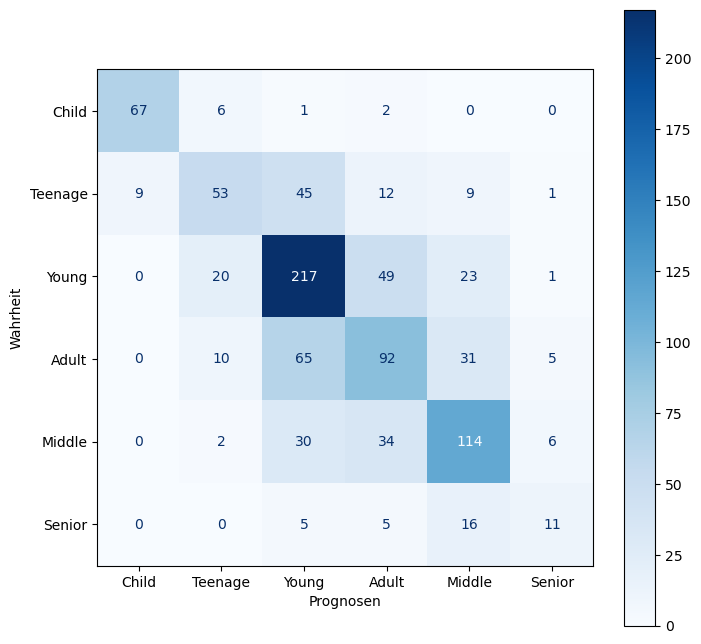

In [11]:
# Schleife über alle Modelle
best_acc   = 0
best_model = ''
for shortcut, model in models.items():
    print(shortcut)
    # Ergebnisse berechnen und ausgeben (Verbesserte Version)
    #  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
    scores = sfm.dst_scores_multi(model, X, y, cv=skf, labels=labels)
    sfm.dst_display_scores_multi(scores, labels=labels)
    # Genauigkeit als Optimierungskriterium
    acc = scores['Accuracy']
    if acc > best_acc:
        best_acc   = acc
        best_model = shortcut
    # Modell mit allen Daten trainieren
    #  (KNIME: "XYZ Learner")
    model.fit(X, y)
    # Trainiertes Modell speichern
    #  (KNIME: "PMML Writer")
    filename = '../../models/titanic/age/' + shortcut + '_v' + str(version)
    pk.dump(model, open(filename, 'wb'))

In [12]:
print('Ergebnis')
print(' Bestes Modell : ', best_model)
print(' Genauigkeit   : ', best_acc)

Ergebnis
 Bestes Modell :  gb
 Genauigkeit   :  0.5887346024636058


## Ergebnisse

#### Version 2 (AgeBinned)

#### k-Nearest Neighbor

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 47.3875 % |
| Makro-F-Maß  | (F-Score)     | 43.2611 % |
| AURC         | (AURC)        | 76.2085 % |
| LogLoss      | (LogLoss)     | 6.5979   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 76.2381 | 60.8929 | 67.1612 |
| Teenage | 51.5408 | 38.9744 | 43.3618 |
| Young | 56.4412 | 55.1613 | 55.3654 |
| Adult | 28.8473 | 37.7857 | 32.5245 |
| Middle | 49.6887 | 53.1287 | 50.9631 |
| Senior | 18.3333 | 7.5 | 10.1905 |
|--------|-----------|--------|-------|
| Makro  | 46.8482 | 42.2405 | 43.2611 |


#### Naive Bayes

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 48.3527 % |
| Makro-F-Maß  | (F-Score)     | 39.6627 % |
| AURC         | (AURC)        | 78.0214 % |
| LogLoss      | (LogLoss)     | 2.5619   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 59.0773 | 97.3214 | 73.0082 |
| Teenage | 28.3333 | 8.4615 | 12.7497 |
| Young | 50.5571 | 76.7742 | 60.7535 |
| Adult | 25.6993 | 9.8571 | 13.8981 |
| Middle | 53.7392 | 54.9708 | 52.5528 |
| Senior | 30.023 | 26.6667 | 25.0137 |
|--------|-----------|--------|-------|
| Makro  | 41.2382 | 45.6753 | 39.6627 |


#### Decision Tree

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 49.4188 % |
| Makro-F-Maß  | (F-Score)     | 49.2428 % |
| AURC         | (AURC)        | 69.1549 % |
| LogLoss      | (LogLoss)     | 17.4961   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 84.5317 | 77.3214 | 80.249 |
| Teenage | 48.7234 | 46.6667 | 46.9734 |
| Young | 56.463 | 54.8387 | 54.967 |
| Adult | 32.9287 | 34.8571 | 33.2847 |
| Middle | 50.6194 | 50.8772 | 50.2279 |
| Senior | 38.4286 | 26.6667 | 29.7547 |
|--------|-----------|--------|-------|
| Makro  | 51.9491 | 48.538 | 49.2428 |


#### MLP

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 50.3673 % |
| Makro-F-Maß  | (F-Score)     | 43.8963 % |
| AURC         | (AURC)        | 82.9795 % |
| LogLoss      | (LogLoss)     | 1.1528   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 86.7421 | 85.7143 | 85.4463 |
| Teenage | 41.4722 | 23.2051 | 29.2835 |
| Young | 52.3067 | 68.3871 | 58.8676 |
| Adult | 32.6256 | 27.5238 | 27.4361 |
| Middle | 55.1856 | 58.655 | 55.4869 |
| Senior | 13.3333 | 5.0 | 6.8571 |
|--------|-----------|--------|-------|
| Makro  | 46.9443 | 44.7475 | 43.8963 |


#### SVM

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 48.14 % |
| Makro-F-Maß  | (F-Score)     | 34.3079 % |
| AURC         | (AURC)        | 81.025 % |
| LogLoss      | (LogLoss)     | 1.2314   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 86.2738 | 67.6786 | 74.5861 |
| Teenage | 0.0 | 0.0 | 0.0 |
| Young | 47.0509 | 83.871 | 60.1191 |
| Adult | 32.5696 | 11.3571 | 16.0619 |
| Middle | 48.9928 | 64.0643 | 55.0805 |
| Senior | 0.0 | 0.0 | 0.0 |
|--------|-----------|--------|-------|
| Makro  | 35.8145 | 37.8285 | 34.3079 |


#### Logistic Regression

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 48.1299 % |
| Makro-F-Maß  | (F-Score)     | 38.6157 % |
| AURC         | (AURC)        | 80.0548 % |
| LogLoss      | (LogLoss)     | 1.2369   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 80.9206 | 74.1071 | 75.8304 |
| Teenage | 29.119 | 13.9103 | 18.37 |
| Young | 48.6228 | 73.871 | 58.4477 |
| Adult | 32.9829 | 15.7619 | 20.3587 |
| Middle | 49.1037 | 62.9825 | 54.6874 |
| Senior | 10.0 | 2.5 | 4.0 |
|--------|-----------|--------|-------|
| Makro  | 41.7915 | 40.5221 | 38.6157 |


#### Random Forest

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 51.2206 % |
| Makro-F-Maß  | (F-Score)     | 49.4304 % |
| AURC         | (AURC)        | 80.8092 % |
| LogLoss      | (LogLoss)     | 2.0887   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 87.377 | 93.5714 | 90.1013 |
| Teenage | 56.2565 | 41.9872 | 46.943 |
| Young | 53.8937 | 58.3871 | 55.7188 |
| Adult | 34.8329 | 31.881 | 32.3906 |
| Middle | 49.7617 | 56.9591 | 52.7618 |
| Senior | 31.6667 | 15.0 | 18.6667 |
|--------|-----------|--------|-------|
| Makro  | 52.2981 | 49.631 | 49.4304 |


#### Gradient Boosted Trees

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 58.7671 % |
| Makro-F-Maß  | (F-Score)     | 56.8464 % |
| AURC         | (AURC)        | 85.4487 % |
| LogLoss      | (LogLoss)     | 1.093   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 88.9246 | 88.0357 | 88.2179 |
| Teenage | 58.1652 | 41.2821 | 46.936 |
| Young | 60.1441 | 69.6774 | 64.2957 |
| Adult | 49.8801 | 45.3333 | 46.09 |
| Middle | 59.2702 | 61.3743 | 59.9912 |
| Senior | 49.1667 | 30.0 | 35.5476 |
|--------|-----------|--------|-------|
| Makro  | 60.9252 | 55.9505 | 56.8464 |


##### Andere Hardware #####

#### Logistic Regression

Gütemaße

| Gütemaß      | (Metrics)     | Wert      |
| -------------| --------------| ----------|
| Genauigkeit  | (Accuracy)    | 48.3415 % |
| Makro-F-Maß  | (F-Score)     | 38.6749 % |
| AURC         | (AURC)        | 80.0342 % |
| LogLoss      | (LogLoss)     | 1.2372   |


Klassenabhängige Gütemaße

| Klasse | Präzision | Recall | F-Maß |
|--------|-----------|--------|-------|
| Child | 80.9206 | 74.1071 | 75.8304 |
| Teenage | 28.3413 | 13.141 | 17.5795 |
| Young | 48.6453 | 74.5161 | 58.6544 |
| Adult | 34.6624 | 15.7619 | 20.6852 |
| Middle | 49.728 | 63.538 | 55.2996 |
| Senior | 10.0 | 2.5 | 4.0 |
|--------|-----------|--------|-------|
| Makro  | 42.0496 | 40.594 | 38.6749 |
